<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

# df = pd.read_csv()

## Demo: How to run an sql query


In [8]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT name FROM sqlite_master WHERE type='table';
"""
# QUERY = """
# SELECT COUNT(*)
# FROM master
# """

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,name


## Demo: How to list all tables


In [4]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name


## Demo: How to run a group by query


In [5]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

DatabaseError: Execution failed on sql '
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
': no such table: master

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<Axes: ylabel='Frequency'>

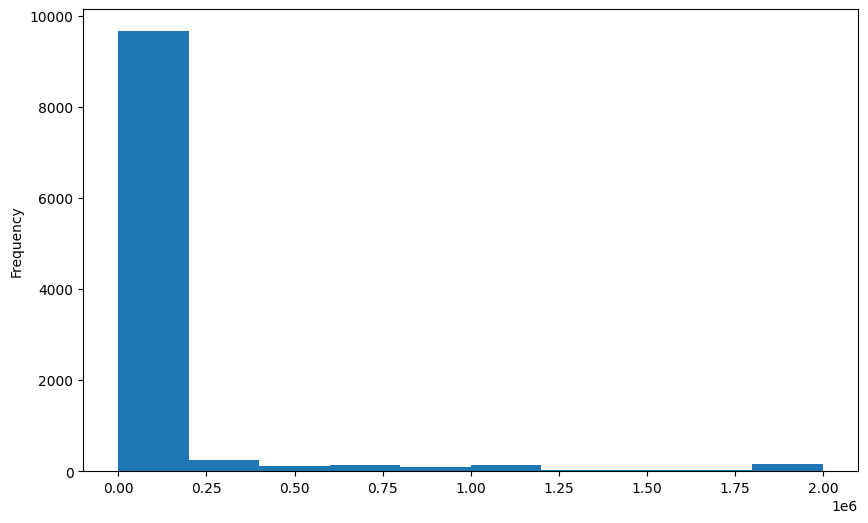

In [3]:
# your code goes here
ccomp = df['ConvertedComp']

ccomp.plot(kind='hist', figsize=(10,6))

### Box Plots


Plot a box plot of `Age.`


<Axes: xlabel='Age'>

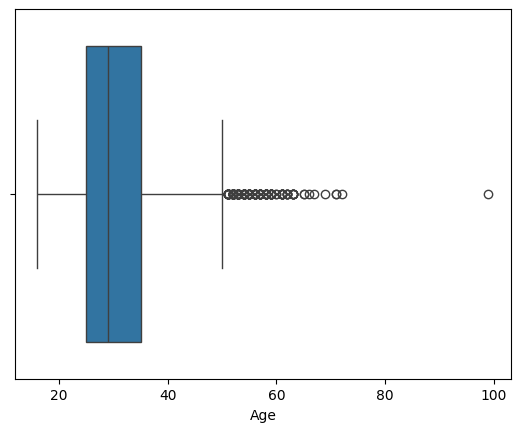

In [6]:
# your code goes here

df_age = df['Age']
# df_age.plot(kind='box')

sns.boxplot(x=df_age)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


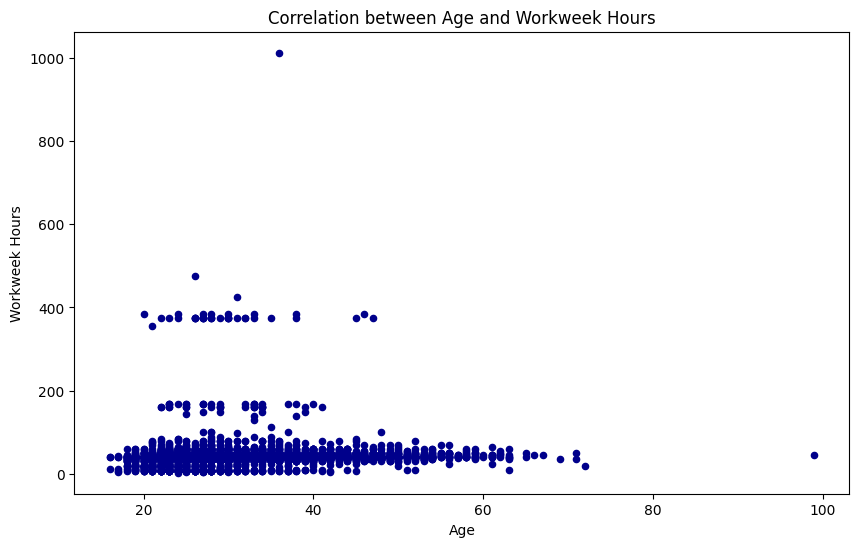

In [8]:
# your code goes here

df_scatter = df[['Age','WorkWeekHrs']]
df_scatter.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

plt.title('Correlation between Age and Workweek Hours')
plt.xlabel('Age')
plt.ylabel('Workweek Hours')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


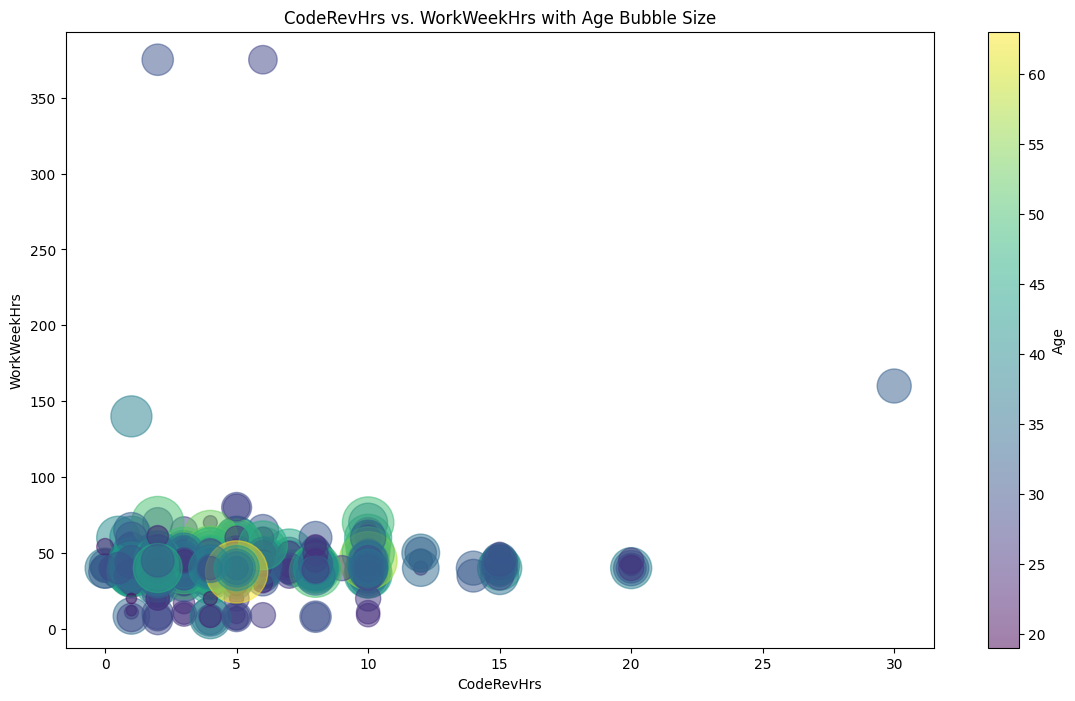

In [23]:
# Bubble Plot for WorkWeekHrs & CodeRevHrs using Age as bubble size

# your code goes here:

df_bubble = df.dropna()

# Normalize Age for bubble size
norm_age = (df_bubble['Age'] - df_bubble['Age'].min()) / (df_bubble['Age'].max() - df_bubble['Age'].min())

# WorkWeekHrs vs CodeRevHrs with Age as bubble size
ax = df_bubble.plot(kind='scatter',
                    x='CodeRevHrs',
                    y='WorkWeekHrs',
                    figsize=(14, 8),
                    alpha=0.5,
                    # cmap='viridis',  # colormap
                    s=norm_age * 2000 + 10,  # bubble size based on Age
                    c='Age',  # color based on Age
                    colorbar=True,  # show color bar
                    sharex=False)

ax.set_xlabel('CodeRevHrs')
ax.set_ylabel('WorkWeekHrs')
ax.set_title('CodeRevHrs vs. WorkWeekHrs with Age Bubble Size')
plt.show()

# norm_code_rev = (df_bubble['CodeRevHrs'] - df_bubble['CodeRevHrs'].min()) / (df_bubble['CodeRevHrs'].max() - df['CodeRevHrs'].min())

# norm_wwh = (df_bubble['WorkWeekHrs'] - df_bubble['WorkWeekHrs'].min()) / (df_bubble['WorkWeekHrs'].max() - df['WorkWeekHrs'].min())

# WorkWeekHrs
# ax0 = df_bubble.plot(kind='scatter',
#                     x='Age',
#                     y='CodeRevHrs',
#                     figsize=(14, 8),
#                     alpha=0.5,  # transparency
#                     color='green',
#                     s=norm_age * 2000 + 10,  # pass in weights 
#                     xlim=(1975, 2015)
#                     )

# # CodeRevHrs
# ax1 = df_bubble.plot(kind='scatter',
#                     x='Age',
#                     y='WorkWeekHrs',
#                     alpha=0.5,
#                     color="blue",
#                     s=norm_age * 2000 + 10,
#                     ax=ax0
#                     )

# ax0.set_xlabel('CodeRevHrs')
# ax0.set_ylabel('WorkWeekHrs')
# ax0.set_title('CodeRevHrs vs. WorkWeekHrs with Age Bubble Size')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [76]:
# Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.

# your code goes here

# df.columns
# df['DatabaseDesireNextYear'].value_counts()

top_databases = df['DatabaseDesireNextYear'].value_counts().head(5)
# top_databases

# databases_worked = df['DatabaseWorkedWith'].value_counts().head(20)
# databases_worked

# Filter values containing 'sql' in the 'DatabaseWorkedWith' column and then count the occurrences
databases_worked_filtered = df[df['DatabaseWorkedWith'].str.contains('sql', case=False, na=False)]['DatabaseWorkedWith'].value_counts()
# databases_worked_filtered

databases_worked_counts = databases_worked_filtered.sum()
# databases_worked_counts

# Add up all the values
# total_counts = databases_worked_counts.sum()
# total_counts

top_lang = df['LanguageDesireNextYear'].value_counts().head(10)
top_lang

# df.columns

# df_db = df.groupby(['DatabaseDesireNextYear'], as_index=False)['DatabaseDesireNextYear'].value_counts()
# df_db.sort_values(['DatabaseDesireNextYear'], ascending=False, axis=0)

# # df_db = df.groupby(['LanguageDesireNextYear'], as_index=False)['LanguageDesireNextYear'].value_counts()
# # df_db.sort_values(['LanguageDesireNextYear'], ascending=False, axis=0)

# plt.figure(figsize=(8, 8))
# plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%')
# # plt.pie(top_lang, labels=top_lang.index, autopct='%1.1f%%')
# plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
# plt.show()

LanguageDesireNextYear
C#;HTML/CSS;JavaScript;SQL;TypeScript    116
Python                                   111
C#;HTML/CSS;JavaScript;SQL                93
HTML/CSS;JavaScript;TypeScript            88
HTML/CSS;JavaScript                       73
C#                                        70
C#;HTML/CSS;JavaScript;TypeScript         63
C#;SQL                                    56
HTML/CSS;JavaScript;PHP;SQL               54
HTML/CSS;JavaScript;Python                53
Name: count, dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


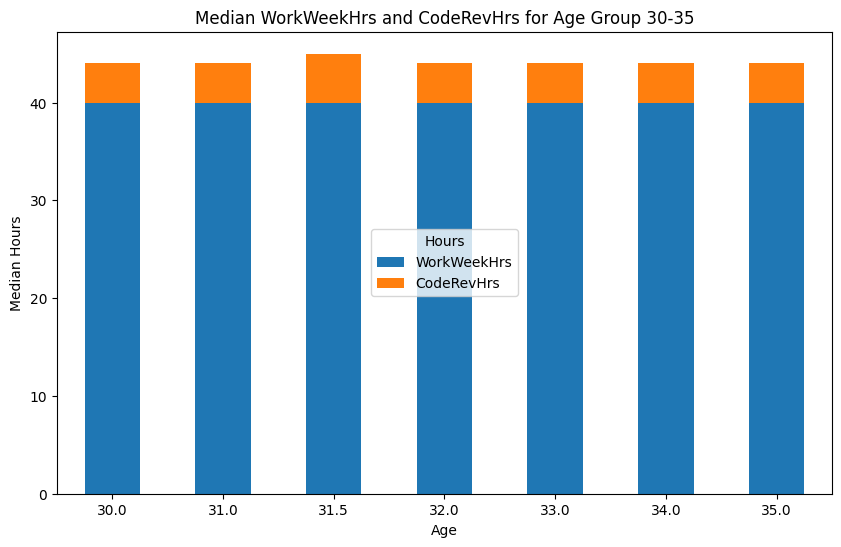

In [79]:
# Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.

# your code goes here

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter data for age group 30 to 35
df_age_group = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Group by age and calculate median WorkWeekHrs and CodeRevHrs
df_age_group_median = df_age_group.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()
df_age_group_median

# Plotting stacked bar chart
df_age_group_median.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.xticks(rotation=0)
plt.legend(title='Hours', loc='center')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


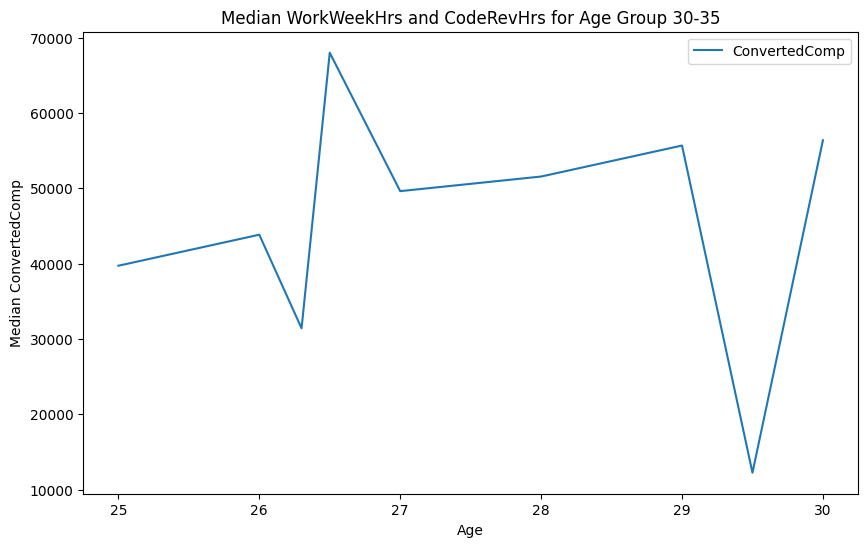

In [89]:
# your code goes here

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter data for age group 30 to 35
df_age_group = df[(df['Age'] >= 25) & (df['Age'] <= 30)]

# Group by age and calculate median WorkWeekHrs and CodeRevHrs
df_converted = df_age_group.groupby('Age')[['ConvertedComp']].median()

# Plotting stacked bar chart
df_converted.plot(kind='line', stacked=True, figsize=(10, 6))

plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
# plt.xticks(rotation=0)
# plt.legend(title='Hours', loc='center')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


MainBranch
I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: count, dtype: int64


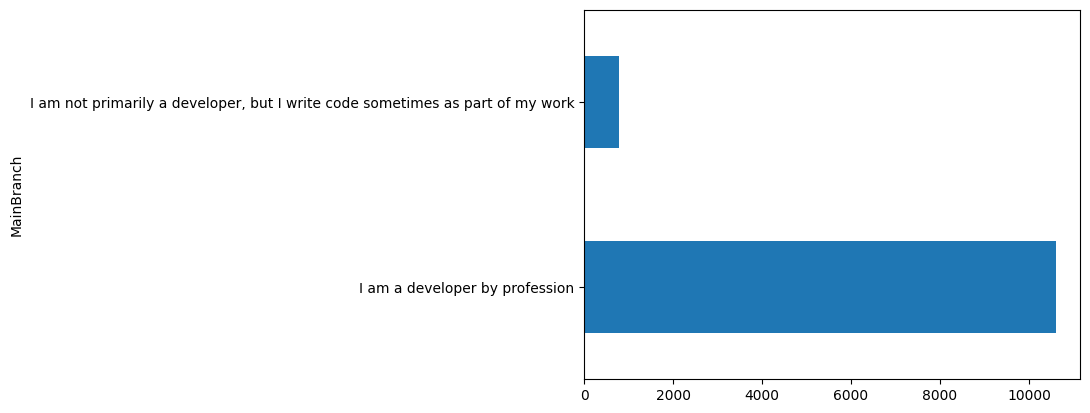

In [84]:
# Create a horizontal bar chart using column 'MainBranch'
# your code goes here:

main_bar = df['MainBranch']

main_bar.value_counts().plot(kind='barh')

print(main_bar.value_counts())

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
